## Setup

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

deg2rad = lambda  x: x * np.pi/180
rad2deg = lambda  x: x * 180 / np.pi

def display_one(image, title = 'Image', cmap = 'gray'):
    fig = plt.figure( figsize=(25,15));
    cs = plt.imshow(image, cmap=cmap)
    fig.colorbar(cs, shrink=0.7, aspect=30, fraction=0.05)
    if cmap == 'gray':
        plt.clim(0,1)
    else:
        plt.clim(0,255)
    plt.title(title)
    plt.show()    
    return

def display_arctan(image, title = 'Image', cmap = 'jet' , clim = (0,np.pi/2)):
    fig = plt.figure( figsize=(25,15));
    cs = plt.imshow(image, cmap=cmap)
    fig.colorbar(cs, shrink=0.7, aspect=30, fraction=0.05)
    plt.clim(clim)
    plt.title(title)
    plt.show()    
    return

def display_two(image1, image2, title1='Original Image', title2 = 'Result Image'):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image1)
    ax1.set_title(title1, fontsize=20)
    ax2.imshow(image2, cmap='gray')
    ax2.set_title(title2, fontsize=20)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    return

In [5]:

# TODO: Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    # 2) Apply a threshold to the S channel
    # 3) Return a binary image of threshold result
    hlsImage = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    print(hlsImage.shape)
    s_channel = hlsImage[:,:,-1]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel >= thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output
    

In [6]:
# Read in an image, you can also try test1.jpg or test4.jpg
image = mpimg.imread('test6.jpg') 


(720, 1280, 3)


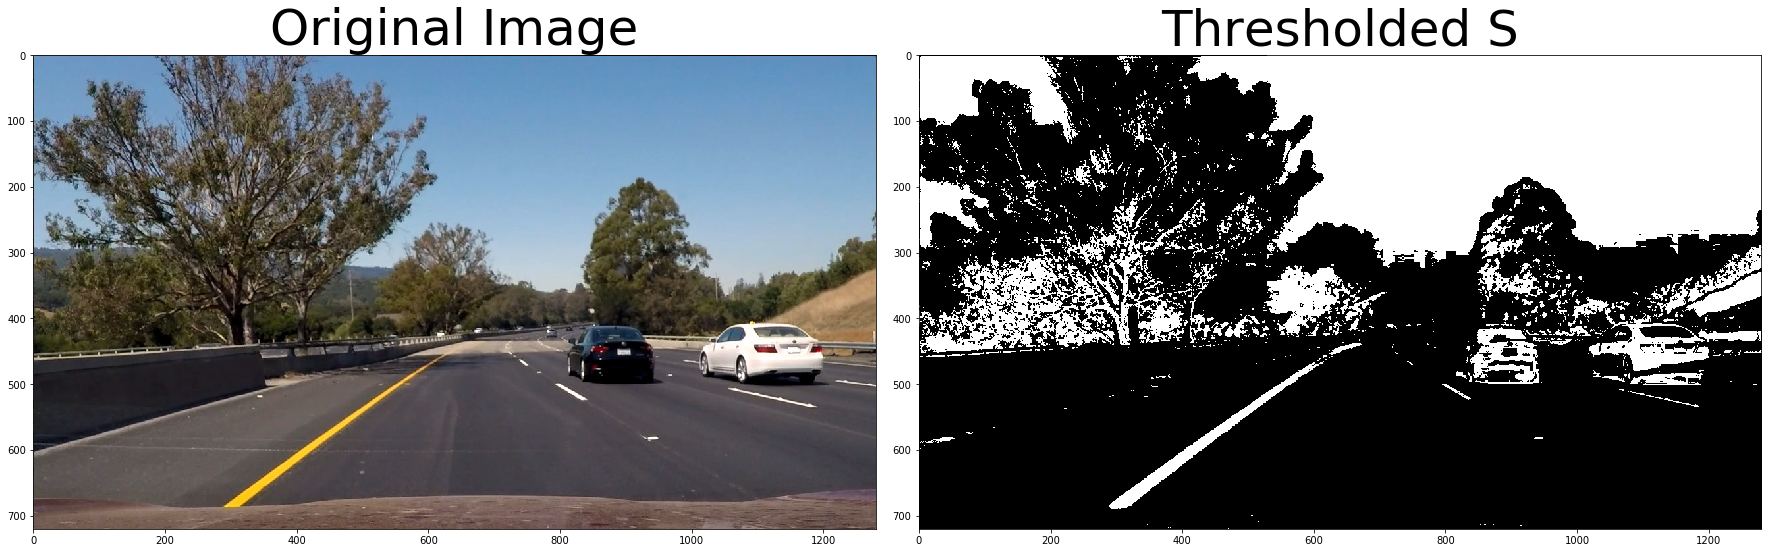

In [7]:
# Optional TODO - tune the threshold to try to match the above image!    
hls_binary = hls_select(image, thresh=(80, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [9]:
 

image = mpimg.imread('bridge_shadow.jpg')

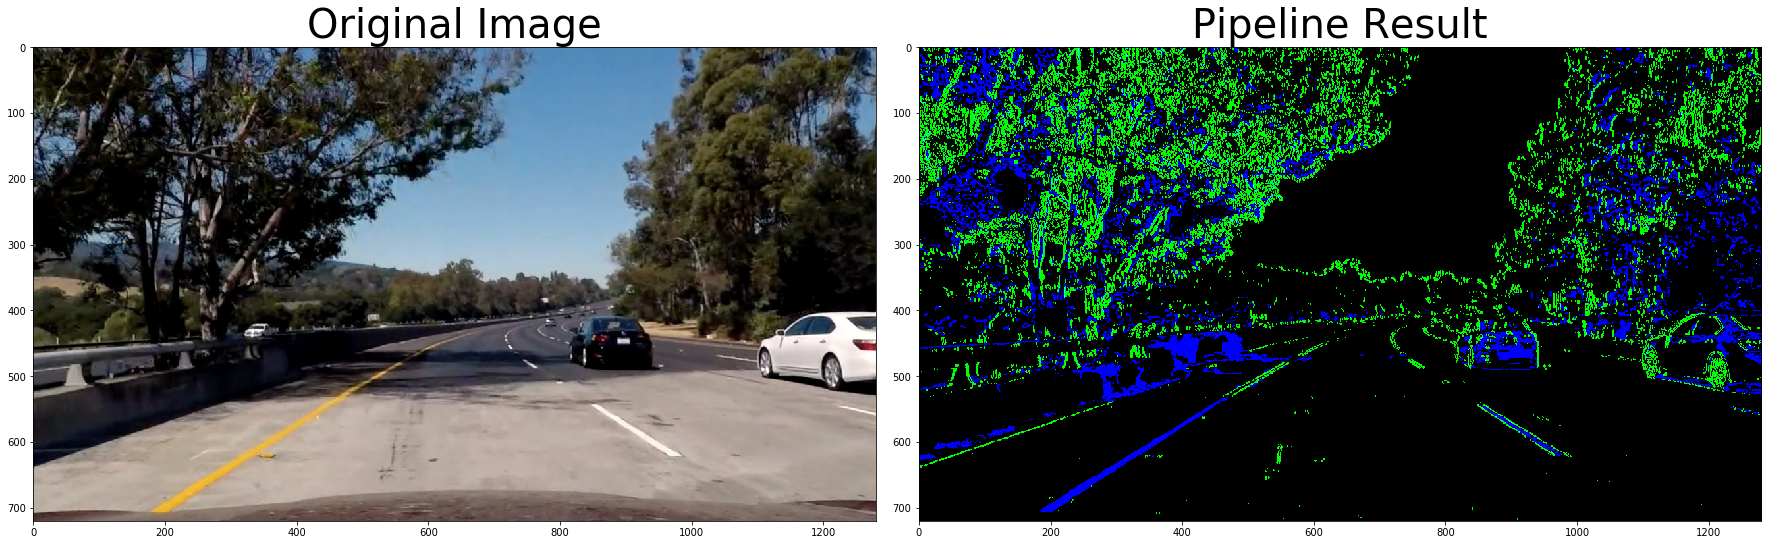

In [10]:
# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary
    
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)